In [3]:
from model import *
from data import *
import os
import matplotlib.pyplot as plt
from utils import plot_segm_history

## Train your Unet with membrane data
membrane data is in folder membrane/, it is a binary classification task.

The input shape of image and mask are the same :(batch_size,rows,cols,channel = 1)

### Train with data generator

In [4]:
data_gen_args = dict(rotation_range=0.2,
                    width_shift_range=0.05,
                    height_shift_range=0.05,
                    shear_range=0.05,
                    zoom_range=0.05,
                    horizontal_flip=True,
                    fill_mode='nearest')
myGene = trainGenerator(2,'data3d/train','frames','masks',data_gen_args,save_to_dir = None)
model = unet()
model_checkpoint = ModelCheckpoint('unet3d.hdf5', monitor='loss',verbose=1, save_best_only=False)
history = model.fit_generator(myGene,steps_per_epoch=30,epochs=3,callbacks=[model_checkpoint])

/home/asli/Desktop/unet_mice_segmentation/unet_3channel/model.py:55: UserWarning: Update your `Model` call to the Keras 2 API: `Model(outputs=Tensor("co..., inputs=Tensor("in...)`
  model = Model(input = inputs, output = conv10)


Epoch 1/3
Found 48 images belonging to 1 classes.
Found 48 images belonging to 1 classes.
30/30 [==============================] - 260s 9s/step - loss: 0.1031 - accuracy: 0.9965

Epoch 00001: saving model to unet3d.hdf5
Epoch 2/3
30/30 [==============================] - 259s 9s/step - loss: 0.0207 - accuracy: 0.9965

Epoch 00002: saving model to unet3d.hdf5
Epoch 3/3
30/30 [==============================] - 261s 9s/step - loss: 0.0164 - accuracy: 0.9965

Epoch 00003: saving model to unet3d.hdf5


### Train with npy file

In [5]:
print(history.history.keys())

dict_keys(['loss', 'accuracy'])


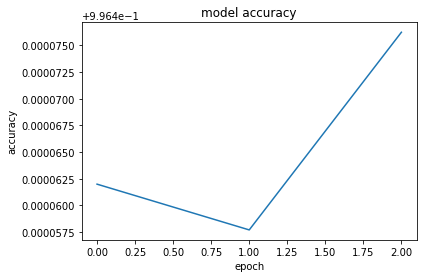

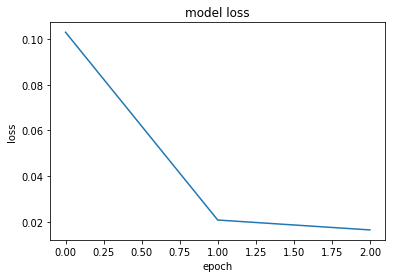

[0.996462, 0.9964577, 0.99647623]


In [6]:
plot_segm_history(history)
print(history.history['accuracy'])


In [ ]:
#imgs_train,imgs_mask_train = geneTrainNpy("data/membrane/train/aug/","data/membrane/train/aug/")
#model.fit(imgs_train, imgs_mask_train, batch_size=2, nb_epoch=10, verbose=1,validation_split=0.2, shuffle=True, callbacks=[model_checkpoint])

### test your model and save predicted results

In [7]:
testGene = testGenerator("data3d/test")
model = unet()
model.load_weights("unet3d.hdf5")
results = model.predict_generator(testGene,10,verbose=1)

if not os.path.exists("data3d/results"):
    os.makedirs("data3d/results")
    
saveResult("data3d/results",results)

10/10 [==============================] - 6s 597ms/step


Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.
Lossy conversion from float32 to uint8. Range [0

In [ ]:
set(results[0].ravel())

In [ ]:
import matplotlib.pyplot as plt
import collections

In [ ]:
plt.imshow(results[0][:,:,0])

In [ ]:
results[0].shape

In [ ]:
for image in results:
    print(collections.Counter(image.ravel()))